Example lactam analysis using a single cores on a very large dataset.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


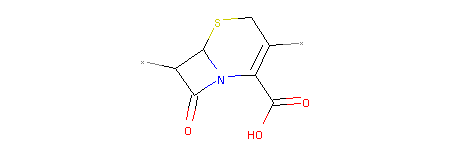

In [2]:
core = Chem.MolFromSmiles('O=C1C([*])C2N1C(C(O)=O)=C([*])CS2')
core

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(core)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.

In [3]:
rg = RGroupDecomposition(core)

mols = []
count = 0
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        idx = rg.Add(m)
rg.Process()
print ("Added %s to RGroup Decomposition out of %s"%(idx, count))

Added 1194 to RGroup Decomposition out of 4340


RDKit ERROR: [07:06:09] SMILES Parse Error: syntax error for input: 'CANONICAL_SMILES'


It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [4]:
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [5]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)

In [ ]:
Just show the fir

,Core,R1,R2,R3,R4,R5,R6
0,,None,,,,,
1,,None,,,,,
2,,None,,,,,
3,,None,,,,,
4,,None,,,,,

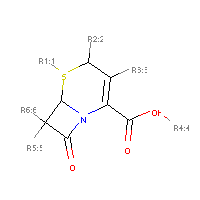
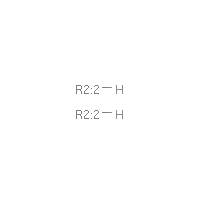
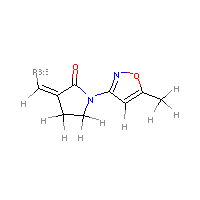
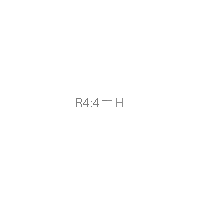
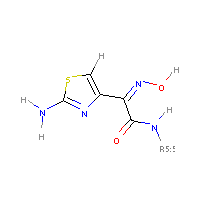
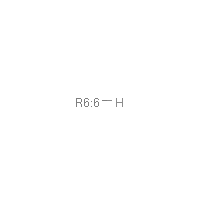
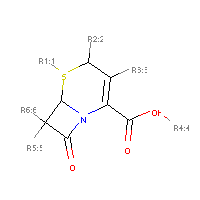
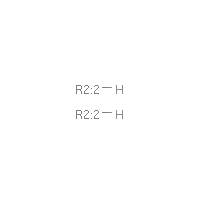
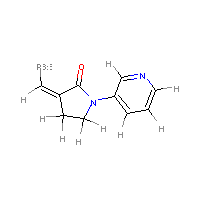
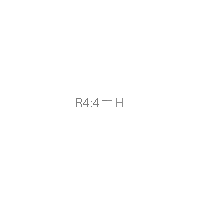
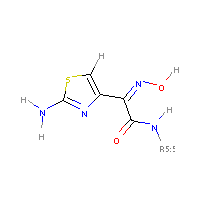
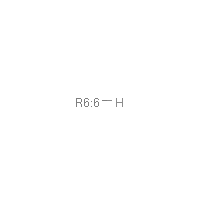
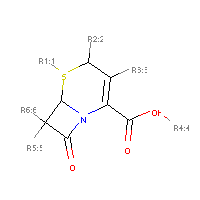
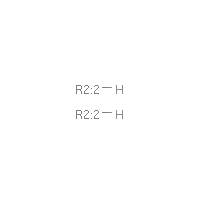
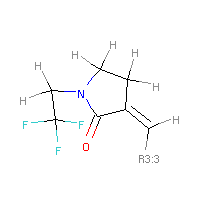
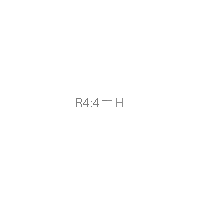
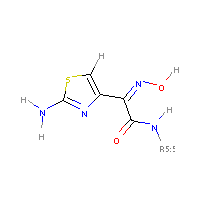
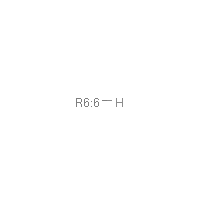
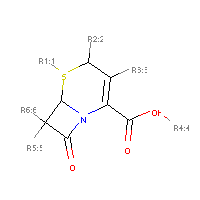
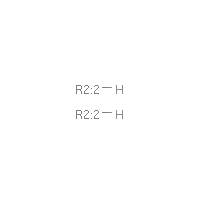
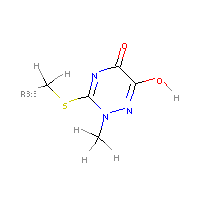
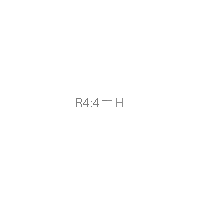
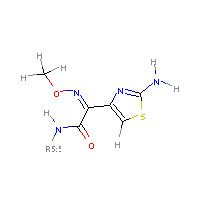
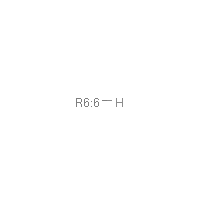
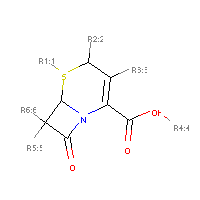
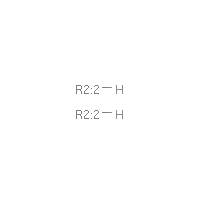
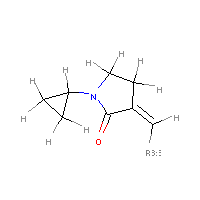
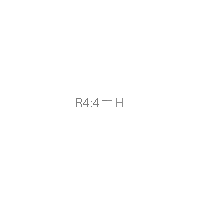
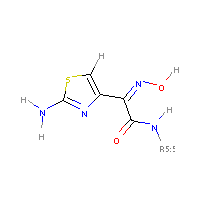
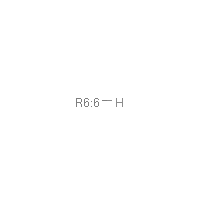

In [10]:
f2 = pd.DataFrame(frame.head())
PandasTools.ChangeMoleculeRendering(f2)
f2